In [1]:
%matplotlib inline
import math  # 標準のmathモジュール

import numpy as np  # NumPy
import pandas as pd  # Pandas

from matplotlib import pylab as plt  # Matplotlib

# matplotlibで日本語表示する為の指定
import japanize_matplotlib

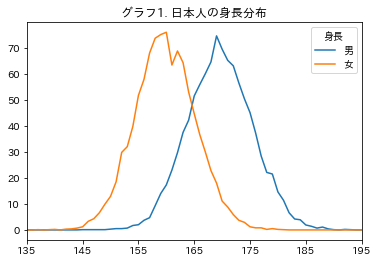

In [2]:
# 生成関数 - 日本人の身長分布
df = pd.read_csv('../../9_data/保健全国統計/身長.csv').set_index('身長').T
df.plot(title='グラフ1. 日本人の身長分布')

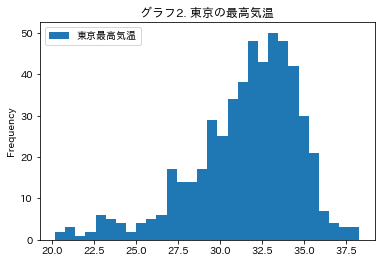

In [3]:
# 2000年以降の東京の8月の最高気温
import pandas as pd

df = pd.read_csv('../../9_data/気温/東京気温.csv')
df['年月日'] = pd.to_datetime(df['年月日'])
df2000 = df[(df['年月日'].dt.year >= 2000) & (df['年月日'].dt.month == 8)]
df2000[['東京最高気温']].plot(kind='hist', title='グラフ2. 東京の最高気温', bins=30)

In [4]:
# 標本データの取り込み
import pandas as pd

df = pd.read_csv('../../9_data/アイドル/AKB.csv')
df.head()

,名前,生年月日,血液型,身長,合格期,選抜回数
0,入山杏奈,1995/12/03,B,160.2,10期生,13回
1,大家志津香,1991/12/28,O,167.0,4期生,5回
2,小嶋菜月,1995/03/08,A,155.0,11期生,0回
3,佐々木優佳里,1995/08/28,B,158.0,12期生,1回
4,白間美瑠,1997/10/14,B,160.0,1期生,NMB48 16回 AKB48 6回


In [5]:
from datetime import datetime

# 17歳未満と身長不明データを除く（2017/11/30調査）
df['年齢'] = datetime(2017, 11, 30) - pd.to_datetime(df['生年月日'])
df['年齢'] = (df['年齢'].dt.days / 365.25).astype(np.int)  # 簡易計算
df = df[(df['年齢'] >= 17) & pd.notnull(df['身長'])]

# 身長(cm)をintに変換しておく
df['身長'] = df['身長'].astype(np.int)

mu = df['身長'].mean()
sigma = df['身長'].std()
pd.DataFrame([[mu, sigma]], columns=['平均', '標準偏差'])

,平均,標準偏差
0,158.377104,4.596475


In [6]:
def normal_dist_pdf(x, mu, sigma):
    """
    正規分布
    :param x: x
    :param mu: 平均
    :param sigma: 標準偏差
    :return: 正規分布
    """
    # expの部分
    exp = np.exp(-1 * ((x - mu) ** 2 / (2 * sigma ** 2)))

    # 残りの部分×expの部分
    return (1 / (np.sqrt(2 * math.pi * sigma ** 2))) * exp

In [7]:
pd.DataFrame(df['身長'].describe())

,身長
count,297.000000
mean,158.377104
std,4.596475
min,147.000000
25%,155.000000
50%,158.000000
75%,162.000000
max,171.000000


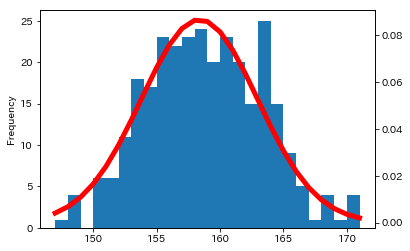

In [8]:
# 実際のデータのヒストグラム
ax = df['身長'].plot(kind='hist', bins=24)

# 147〜171cmを対象とする（今回のデータの範囲）
x = range(147, 172)

# 今回作った関数でラインを書く
y = [normal_dist_pdf(i, mu, sigma) for i in x]

ax2 = ax.twinx()
ax2.plot(x, y, color='r', linewidth=5.0)

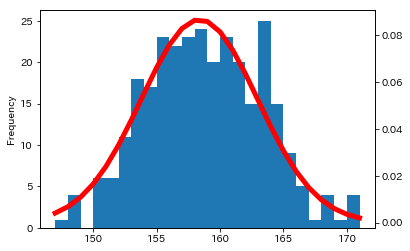

In [9]:
from scipy.stats import norm

mu = df['身長'].mean()
sigma = df['身長'].std()

# locに平均、scaleに標準偏差を指定して実行します
r = range(147, 172)
pdf = norm.pdf(r, loc=mu, scale=sigma)

# グラフに書くとこうなります
ax = df['身長'].plot(kind='hist', bins=24)
ax2 = ax.twinx()
ax2.plot(r, pdf, color='r', linewidth=5.0)

In [10]:
df = pd.read_csv('../../9_data/プロ野球/プロ野球選手身長体重.csv')
df.head()

,チーム,背番号,氏名,生年月日,身長,体重,投,打
0,広島,11,福井 優也,1988.02.08,178,85,右,右
1,広島,12,九里 亜蓮,1991.09.01,187,92,右,右
2,広島,13,加藤 拓也,1994.12.31,176,88,右,右
3,広島,14,大瀬良 大地,1991.06.17,187,93,右,右
4,広島,16,今村 猛,1991.04.17,183,98,右,右


(0.0, 0.12)

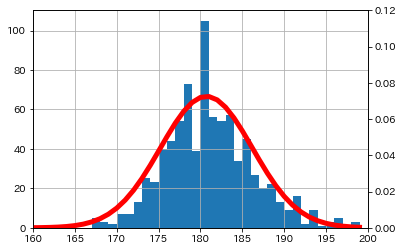

In [11]:
def normal_dist_pdf(x, mu, sigma):
    """
    正規分布
    :param x: x
    :param mu: 平均
    :param sigma: 標準偏差
    :return: 正規分布
    """
    # expの部分
    exp = np.exp(-1 * ((x - mu) ** 2 / (2 * sigma ** 2)))

    # 残りの部分×expの部分
    return (1 / (np.sqrt(2 * math.pi * sigma ** 2))) * exp


ax = df['身長'].hist(bins=40)

# 実際のデータのヒストグラム
mu = df['身長'].mean()
sigma = df['身長'].std()

x = range(160, 200)
y = [normal_dist_pdf(i, mu, sigma) for i in x]
ax2 = ax.twinx()
ax2.plot(x, y, color='r', linewidth=5.0)
ax2.set_xlim([160, 200])
ax2.set_ylim([0.0, 0.12])